<a href="https://colab.research.google.com/github/wallik2/DeepLearningAndrewNG/blob/main/LogisticRegression/%5BVectorized%5D_Logistic_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [443]:
!pip install kora kaggle --quiet

In [444]:
from kora import kaggle
import pandas as pd, numpy as np,seaborn as sns

print("If failed, download Kaggle API to your drive first")

If failed, download Kaggle API to your drive first


In [445]:
kaggle.download('blastchar/telco-customer-churn')

  0% 0.00/172k [00:00<?, ?B/s]
100% 172k/172k [00:00<00:00, 65.9MB/s]


In [446]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [447]:
df.replace(" ", float("NaN") , inplace=True)

In [448]:
df.isna().sum(axis=0)

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [449]:
df.dropna(axis=0, inplace=True)
df.reset_index(drop='index',inplace=True)

In [450]:
dicts = {'Yes': 1 , 'No': 0 }

df.replace({"PaperlessBilling": dicts , "Churn":dicts } , inplace=True)

In [451]:
X = df[['tenure'	,'TotalCharges'	,'PaperlessBilling']]
y = df[['Churn']]

In [452]:
X 

,tenure,TotalCharges,PaperlessBilling
0,1,29.85,1
1,34,1889.5,0
2,2,108.15,1
3,45,1840.75,0
4,2,151.65,1
...,...,...,...
7027,24,1990.5,1
7028,72,7362.9,1
7029,11,346.45,1
7030,4,306.6,1


In [453]:
X.TotalCharges = pd.to_numeric(X.TotalCharges)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [454]:
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7027,0
7028,0
7029,0
7030,1


<details>
<summary>Logistic REgression Framework</summary>

<img src = 'https://i.ibb.co/cr1sQJ8/IMG-8053.jpg'>



</details>





---





---



In [455]:
import numpy as np
from time import time

current_epoch = 0

def sigmoid(z):
  return 1/(1+np.exp(-z))

def binary_cross_entropy(a,y):
  return np.sum(-((y * np.log(a)) + ((1-y) * np.log(1-a))))

m = len(X)
# Setup Parameters
w = np.zeros([3,1])
w_t = w.transpose()
b = 0

# Setup Data
X = X.to_numpy().transpose()
y = y.to_numpy().transpose()

In [456]:
epoch = 1000000
lr = 10**-6
current_epoch = 0

losses = []

In [457]:
tic = time()

while current_epoch <= epoch:

  z = np.dot(w_t , X) + b
  a = sigmoid(z)

  loss = binary_cross_entropy(a,y)

  #Loss function of w,b
  dz = a-y
  dw = np.dot(dz,X.transpose()) / m
  db = np.sum(dz) / m
  
  #Update Param
  w_t -= lr*dw 
  b -= lr*db 

  current_epoch += 1


  losses.append(loss)
  print(f'Epoch :{current_epoch}/{epoch}/|===========loss=========|{loss}')

toc = time()

Streaming output truncated to the last 5000 lines.
Epoch :995002/1000000/|===========loss=========|3364.4503608349723
Epoch :995003/1000000/|===========loss=========|3364.450348560855
Epoch :995004/1000000/|===========loss=========|3364.450336286741
Epoch :995005/1000000/|===========loss=========|3364.4503240126287
Epoch :995006/1000000/|===========loss=========|3364.4503117385184
Epoch :995007/1000000/|===========loss=========|3364.4502994644113
Epoch :995008/1000000/|===========loss=========|3364.450287190306
Epoch :995009/1000000/|===========loss=========|3364.450274916203
Epoch :995010/1000000/|===========loss=========|3364.4502626421026
Epoch :995011/1000000/|===========loss=========|3364.450250368004
Epoch :995012/1000000/|===========loss=========|3364.4502380939084
Epoch :995013/1000000/|===========loss=========|3364.450225819815
Epoch :995014/1000000/|===========loss=========|3364.4502135457233
Epoch :995015/1000000/|===========loss=========|3364.450201271635
Epoch :995016/1000

In [458]:
print(f"{epoch} epoch : {(toc-tic)/60} minute")

1000000 epoch : 29.48667250474294 minute


In [459]:
print(f'w1 :{w_t[0,0]} , w2:{w_t[0,1]}, w3: {w_t[0,2]} , b: {b}')

w1 :-0.10262458065909442 , w2:0.0007693487294052745, w3: 0.03867676044051132 , b: 0.013266026216459876


Text(0, 0.5, 'loss')

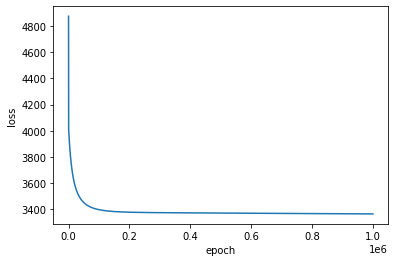

In [460]:
import matplotlib.pyplot as plt

plt.plot(list(range(epoch+1)),losses)
plt.xlabel('epoch')
plt.ylabel('loss')